# Test Registration Functions Showcase

In this example page I will show how the registration algorithms (`lap`, `pflap`, `sparse_lap` and `sparse_pflap`)
perform. I will will show their speed and the quality of their outputs.

First I some testing images:

In [1]:
# using the package and TimerOutputs
using LAP_julia, TimerOutputs

# default arguments:
img, imgw, flow = gen_init();

See the `Basic Interaction` section or the `Public Documentation` for more advanced input generation

__These are the differences between the `target` (`img`) and `source` (`imgw`) images.__

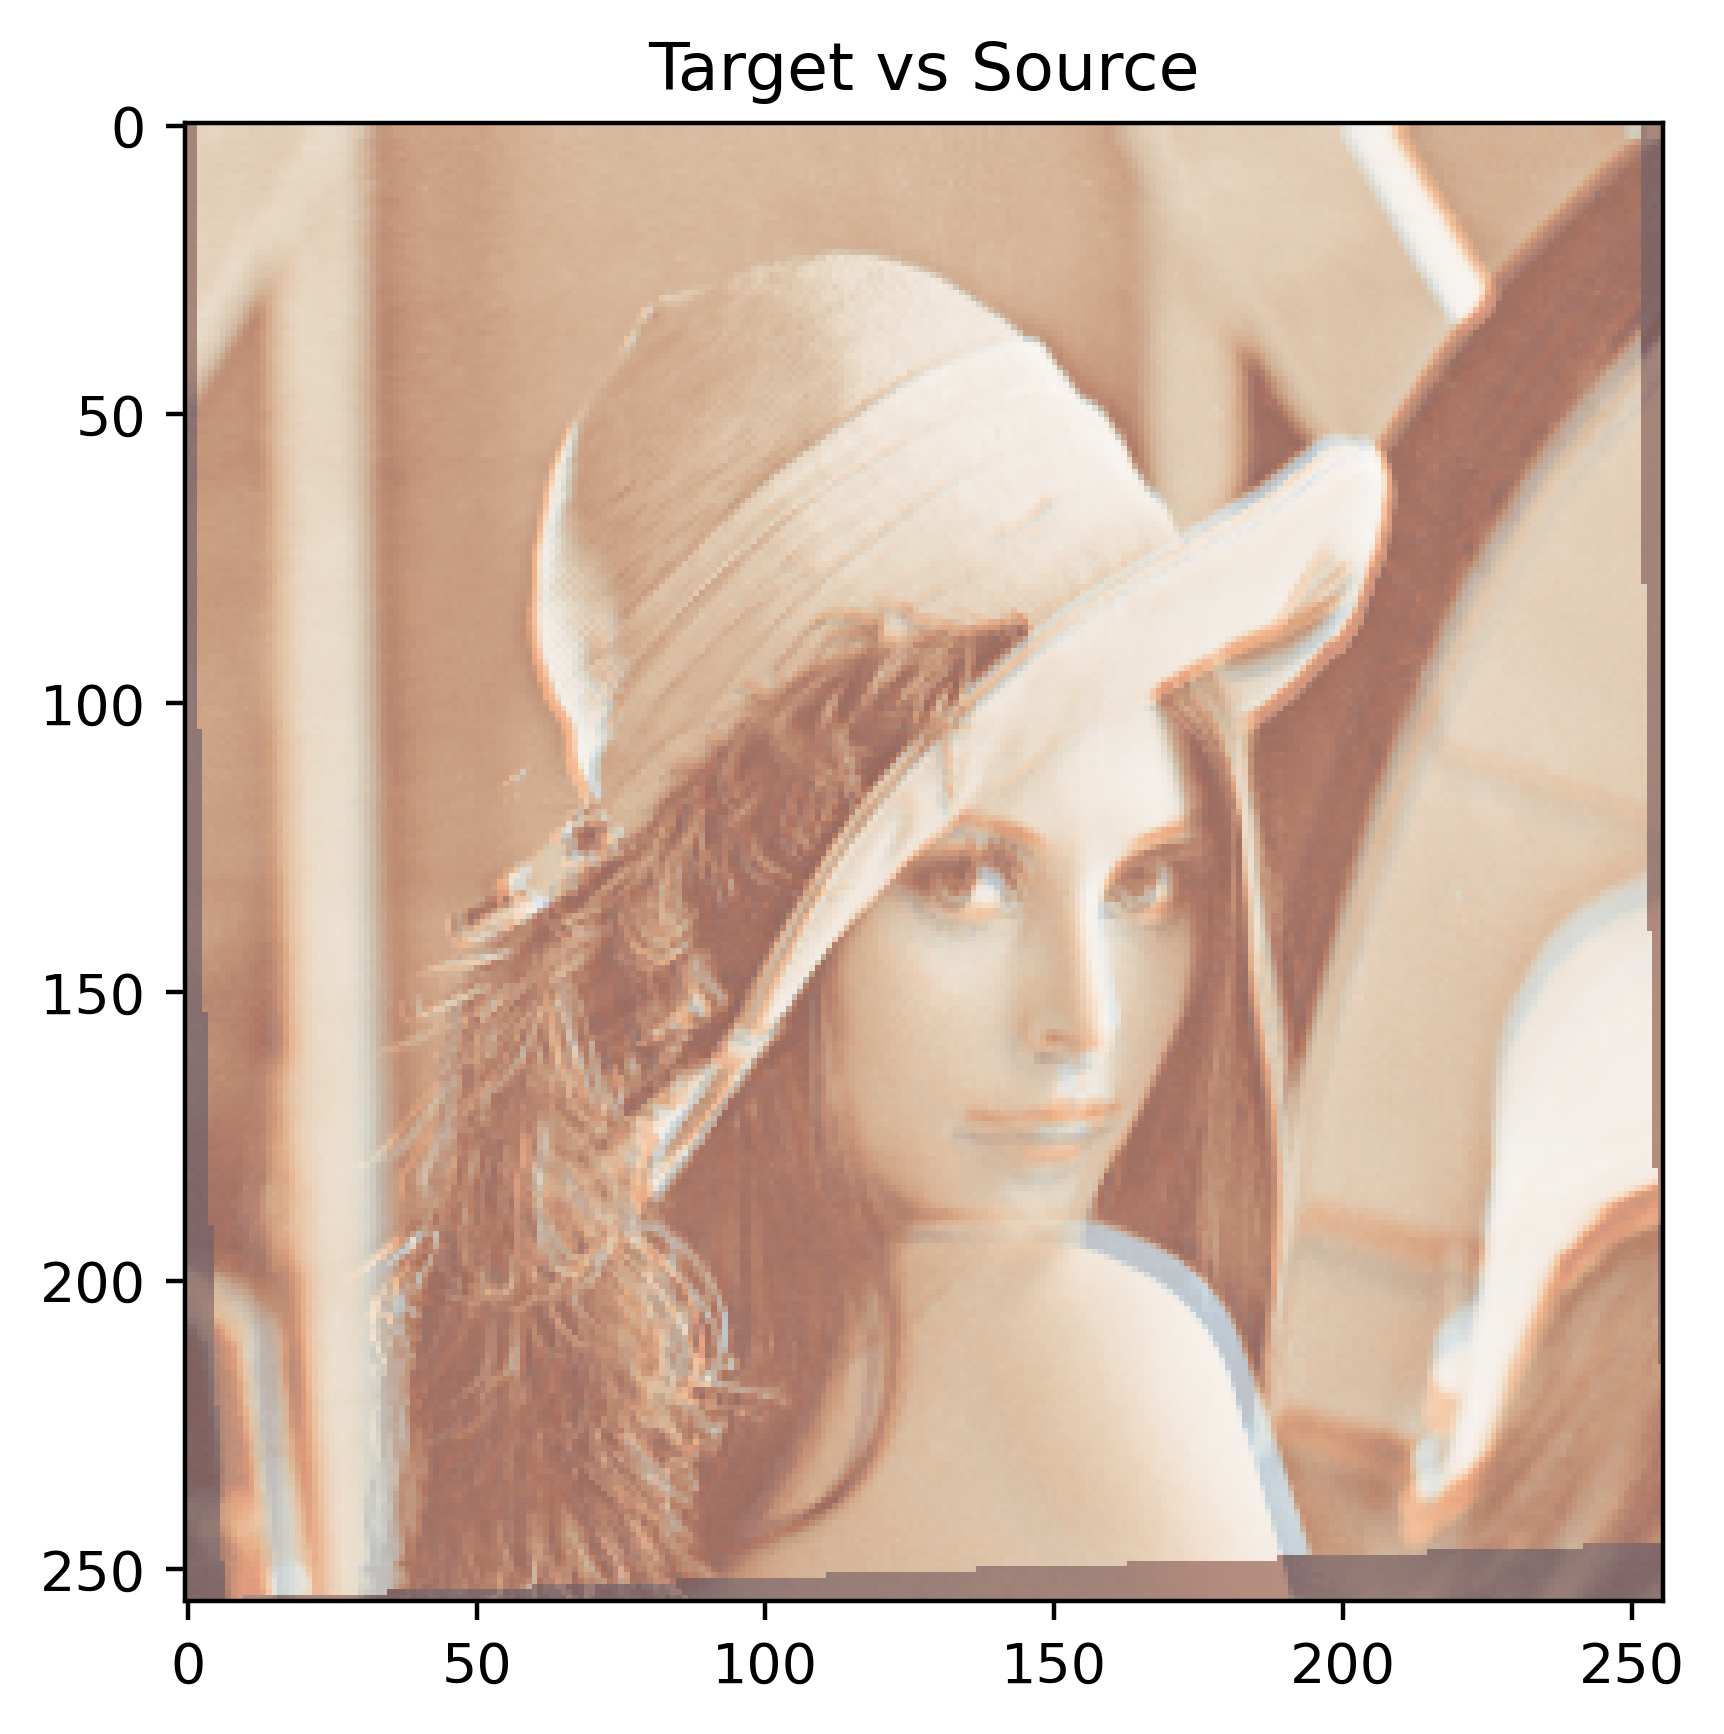

In [2]:
imgoverlay(img, imgw, figtitle="Target vs Source")

## `test_registration_alg`

This function times the registration algorithm on the inside and then test the output flow - `flow_est` and aligned source - `source_reg`.

In [3]:
# choose a method
method = sparse_pflap
# start a timer
timer = TimerOutput("ALG: " * string(method))
# set the keyword arguments of the method
method_kwargs = Dict(:display => false, :timer => timer, :match_source_histogram => false)
# set the arguments of the method if any
method_args = []
# start the test
flow_est, source_reg, timer, results = test_registration_alg(method,
                                                             img,
                                                             imgw,
                                                             flow,
                                                             timer=timer,
                                                             method_args=method_args,
                                                             only_flow_compare=false, # this adds source reg tests.
                                                             method_kwargs=method_kwargs)

 ────────────────────────────────────────────────────────────────────────────
                                     Time                   Allocations      
                             ──────────────────────   ───────────────────────
      Tot / % measured:           2.63s / 15.4%            345MiB / 47.8%    

 Section             ncalls     time   %tot     avg     alloc   %tot      avg
 ────────────────────────────────────────────────────────────────────────────
 ALG: sparse_pflap        1    404ms   100%   404ms    165MiB  100%    165MiB
 ────────────────────────────────────────────────────────────────────────────
  mse            | 0.002
  rmse           | 0.04
  time           | 0.404
  ncc            | 0.977
  flow_mae       | 0.122
  angle-rmse     | 50.891
  angle-mae      | 8.391
  mae            | 0.015
  flow_rmse      | 0.027


(Complex{Float64}[-1.0571486774266694 - 0.09256718096357533im -1.0590204901822144 - 0.09069815314075226im … 3.451874707475402 - 0.09384745102531275im 3.4894057708053166 - 0.09574137448358691im; -1.0584487949846284 - 0.09361496317848471im -1.0603116007534714 - 0.09159667195806033im … 3.4528623645398304 - 0.05698233024949102im 3.4904024348564464 - 0.058726990310163873im; … ; -6.184784138279624 - 0.20495126408654385im -6.184368176412782 - 0.16516933327298966im … -1.0946659992913252 + 9.423645825497431im -1.054847161339024 + 9.459664805029886im; -6.2240084107872375 - 0.2047836107325678im -6.223583441933693 - 0.16485241652141228im … -1.131602497176552 + 9.461726381842137im -1.0917746522375489 + 9.497894624772195im], [0.03630621860047218 0.6352941176470588 … 0.6515444495436375 0.3139053698589859; 0.03713217563729347 0.6352941176470588 … 0.6503186558356234 0.31381875512972623; … ; 0.036282641084251825 0.19757036472119838 … 0.39215686274509803 0.3843137254901961; 0.17254901960784313 0.21568627

__Check the generated flow and the original flow:__

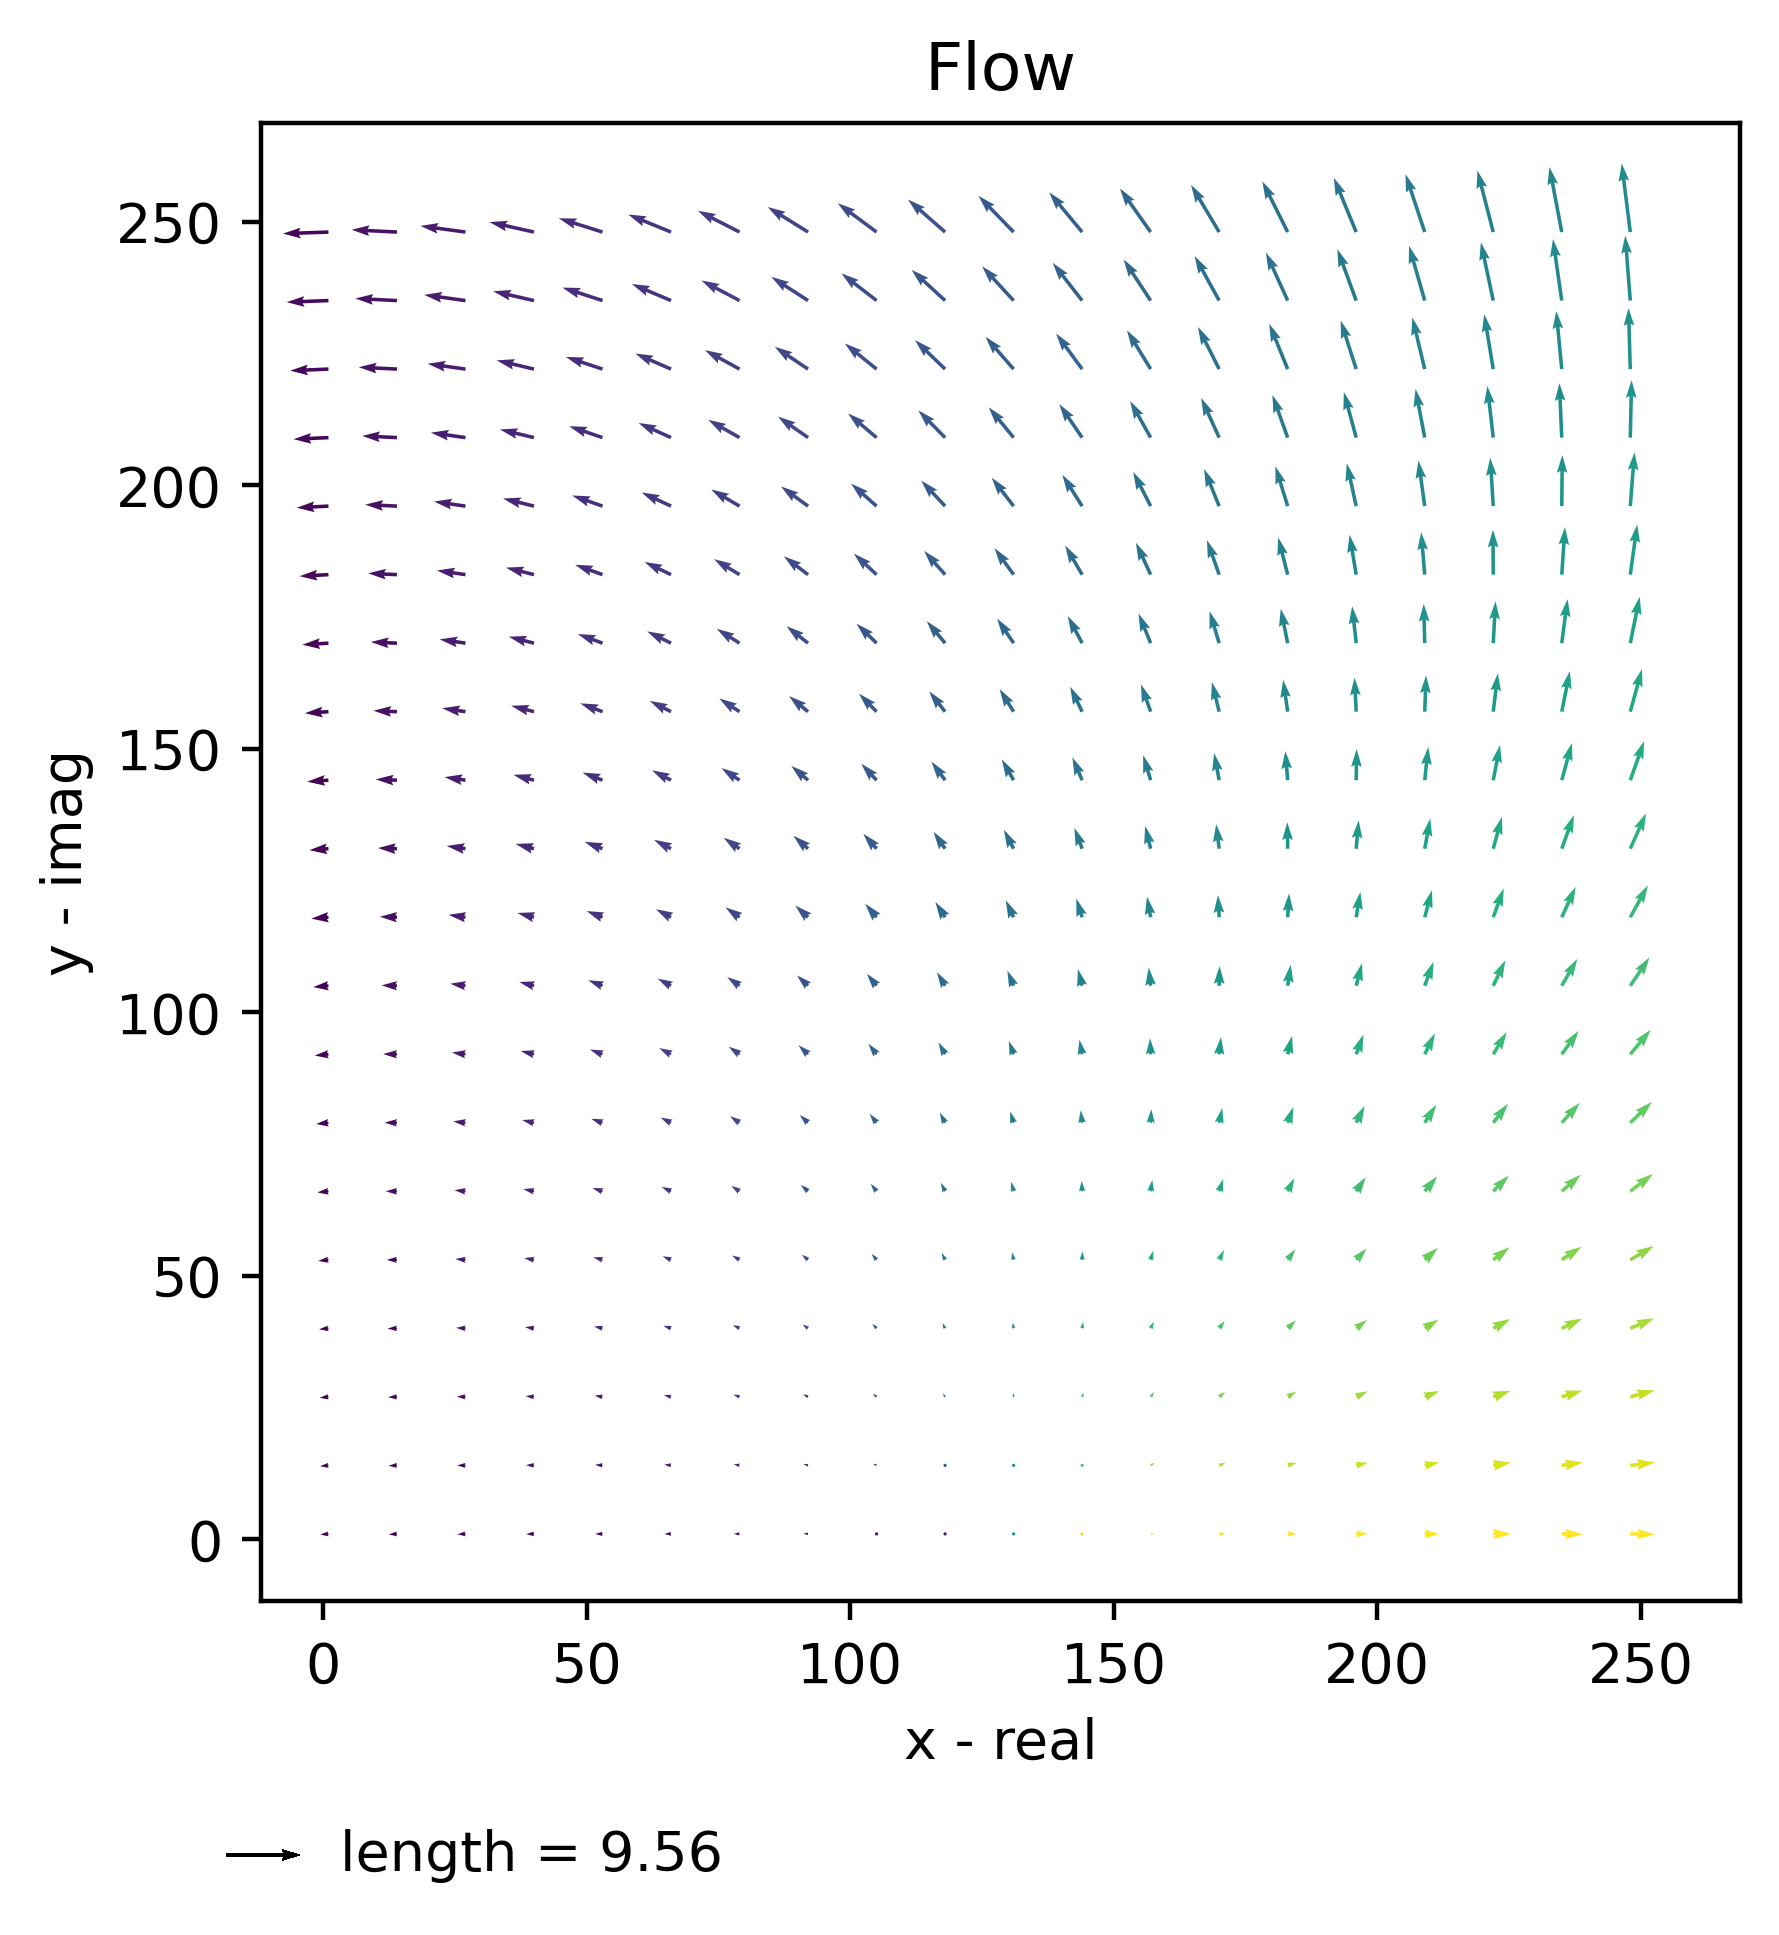

In [4]:
showflow(flow.*(-1))
showflow(flow_est)

#### Compare it with the `pflap` function

In [5]:
method = pflap
# same inputs, new timer
timer = TimerOutput("ALG: " * string(method))
flow_est, source_reg, timer, results = test_registration_alg(method,
                                                             img,
                                                             imgw,
                                                             flow,
                                                             timer=timer,
                                                             method_args=method_args,
                                                             only_flow_compare=false, # this adds source reg tests.
                                                             method_kwargs=method_kwargs)

 ─────────────────────────────────────────────────────────────────────
                              Time                   Allocations      
                      ──────────────────────   ───────────────────────
   Tot / % measured:       3.20s / 100%            1.02GiB / 99.4%    

 Section      ncalls     time   %tot     avg     alloc   %tot      avg
 ─────────────────────────────────────────────────────────────────────
 ALG: pflap        1    3.18s   100%   3.18s   1.01GiB  100%   1.01GiB
 ─────────────────────────────────────────────────────────────────────
  mse            | 0.001
  rmse           | 0.026
  time           | 3.184
  ncc            | 0.99
  flow_mae       | 0.329
  angle-rmse     | 74.04
  angle-mae      | 19.825
  mae            | 0.013
  flow_rmse      | 0.28


(Complex{Float64}[-4.941237301238201 + 4.115933449503257im -4.985975825152488 + 4.136003082290105im … 3.4678222872583513 + 1.5277566883368594im 3.541175207505852 + 1.7163174424819903im; -4.772434436430997 + 3.8364518160962637im -4.882054389546369 + 3.910327286887979im … 3.559007501834155 + 1.1657902961878828im 3.656409259262604 + 1.308480798988775im; … ; -6.690622642173012 + 0.786284285798212im -6.560800294389042 + 0.7515573575090257im … -2.3322735248698074 + 10.870971632936458im -2.3259361554026796 + 10.92113862143584im; -6.5900346795715565 + 0.9790142898506269im -6.468638191417341 + 0.927080663993276im … -2.4682242873852216 + 10.99118392889432im -2.364692205199778 + 10.954038220262479im], [0.6352941176470588 0.6352941176470588 … 0.6705882352941176 0.6078431372549019; 0.6352941176470588 0.6352941176470588 … 0.6705882352941176 0.6078431372549019; … ; 0.14575820579422902 0.21069136455013665 … 0.39215686274509803 0.3843137254901961; 0.11498329809316109 0.19914440326441135 … 0.39215686274

__Check the generated flow and the original flow:__

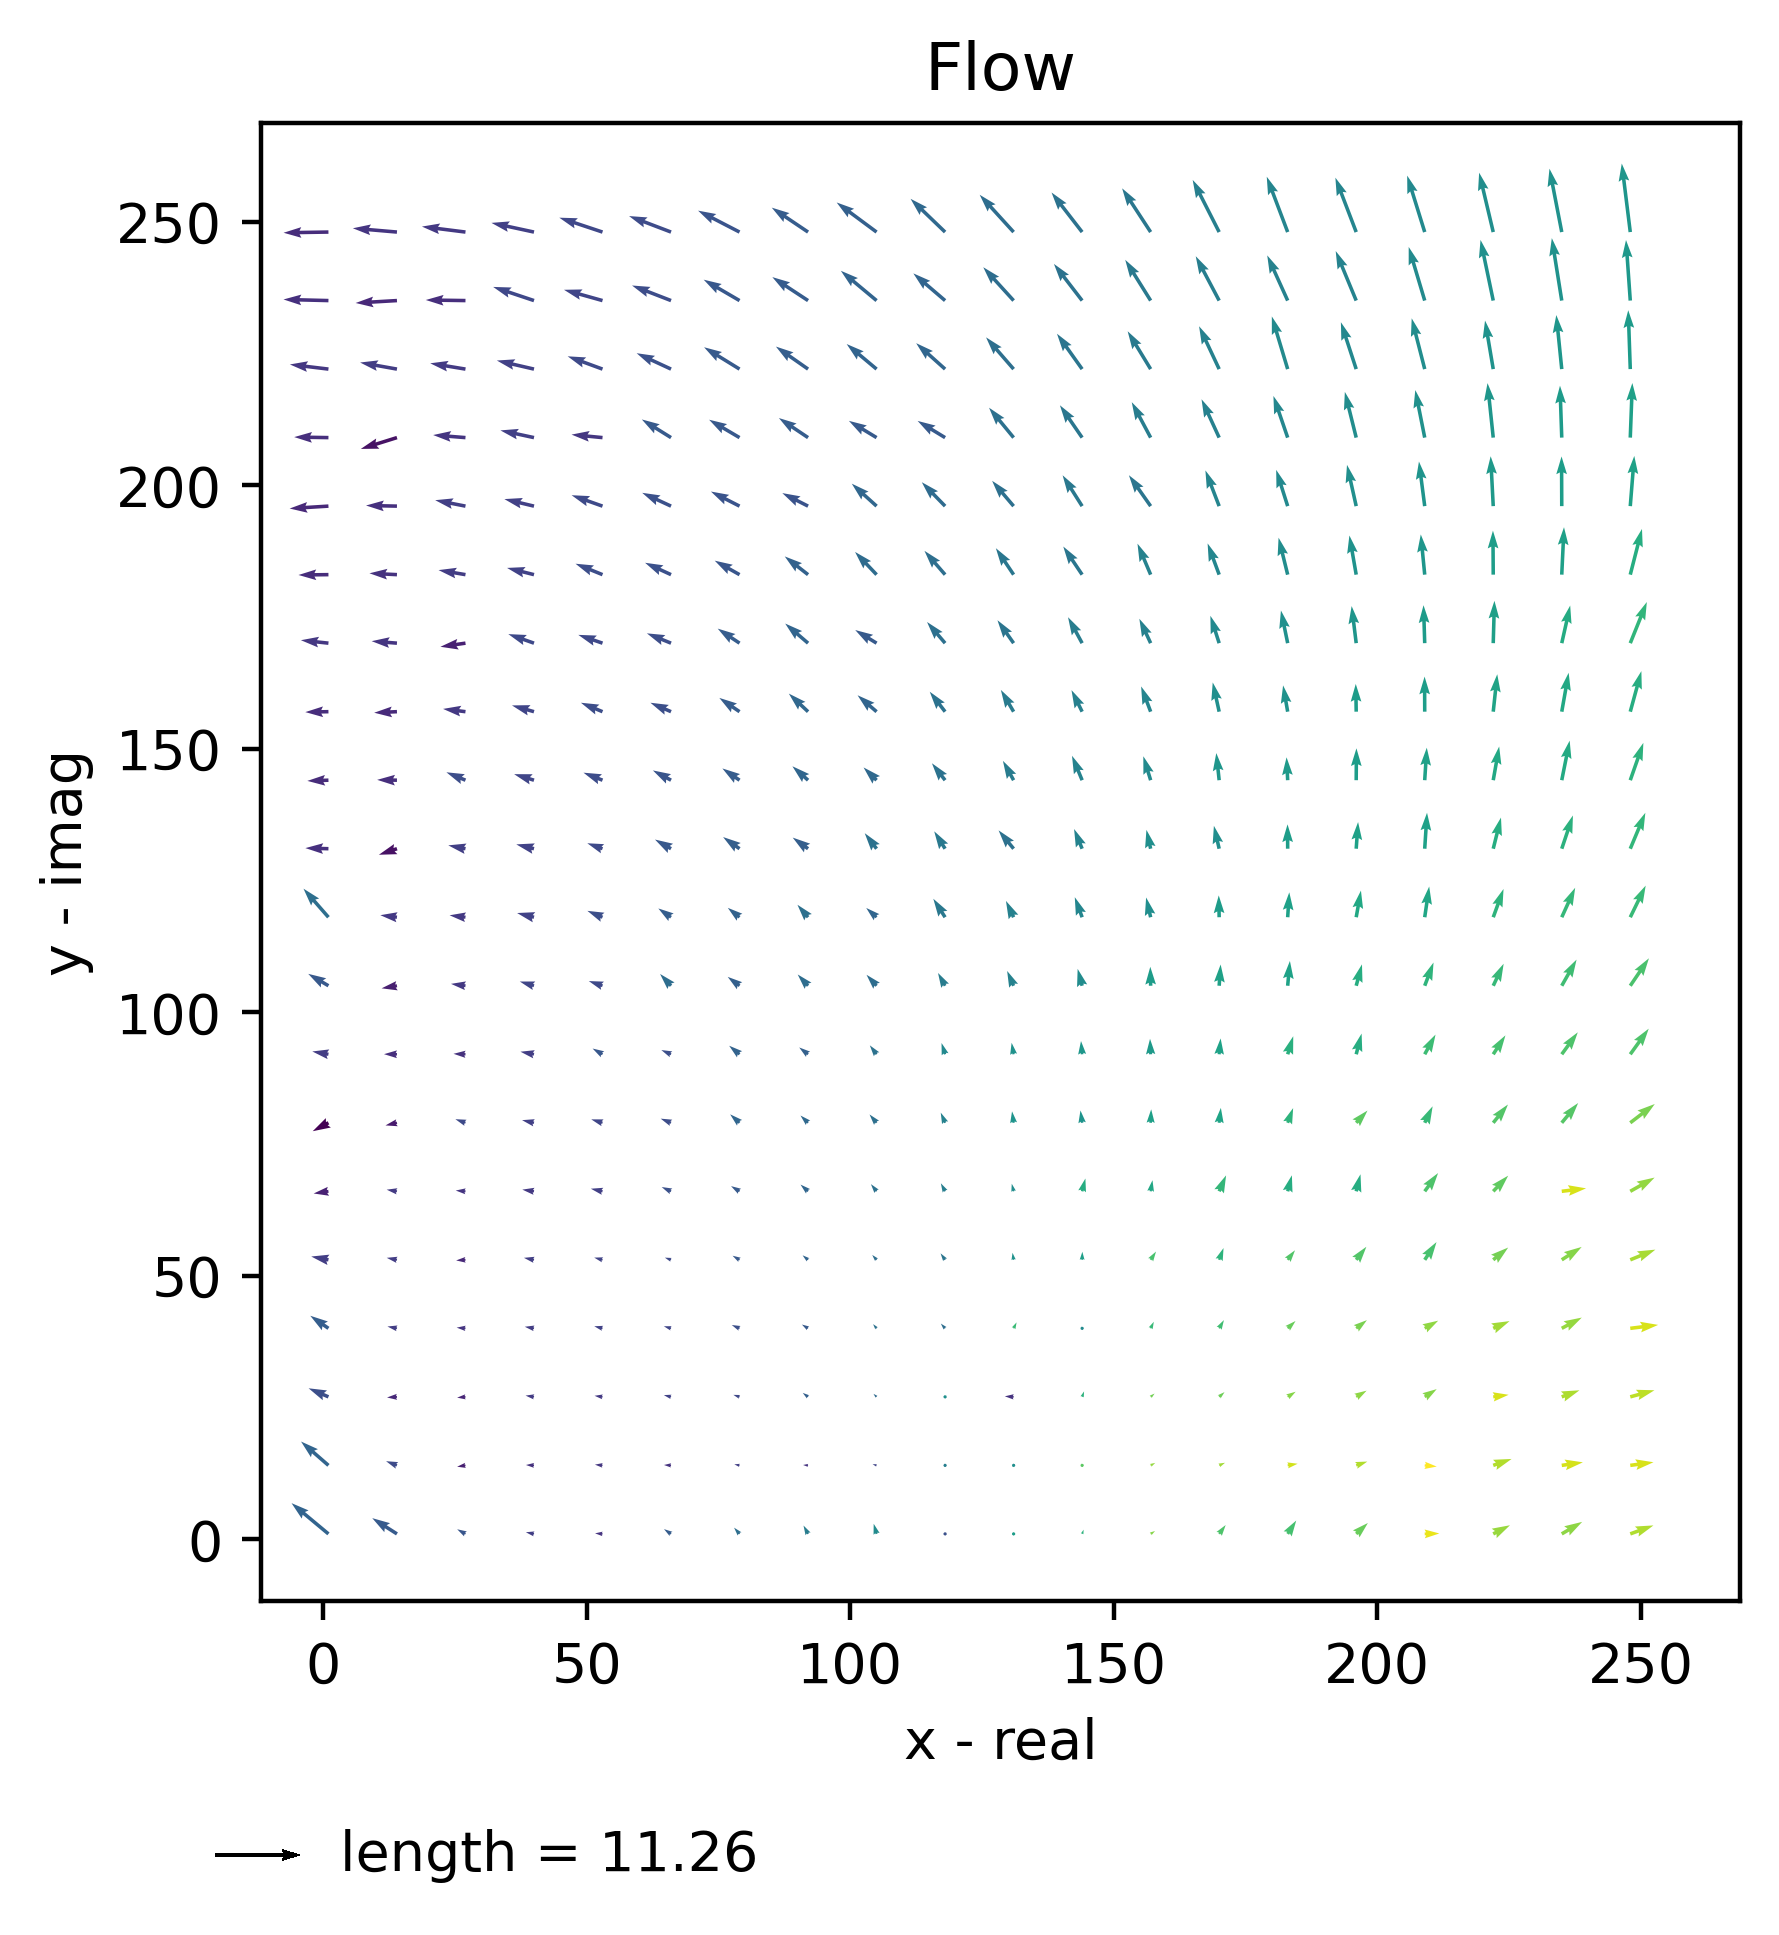

In [6]:
showflow(flow.*(-1))
showflow(flow_est)

The `time_reg_alg` is used to time the registration algorithm, when the original flow isn't known.

## using the `display` keyword
The registration algorithms have a display keyword argument, that can be set to true to output figures
showing the `flow_est` at each iteration and print some extra debug info.

In [7]:
method = sparse_pflap
timer = TimerOutput("ALG: " * string(method))
method_kwargs = Dict(:display => true, :timer => timer, :match_source_histogram => false)
method_args = []

flow_est, source_reg, timer, results, (figs,) = test_registration_alg(method,
                                                                      img,
                                                                      imgw,
                                                                      flow,
                                                                      timer=timer,
                                                                      method_args=method_args,
                                                                      only_flow_compare=false, # this adds source reg tests.
                                                                      method_kwargs=method_kwargs)

ind count: 459
###################
ITERATION: 1
filter_half_size: 64
inner loop iter: 1
	current inds: 119
	non NaN new estim flow vector count: 119
###################
ITERATION: 2
filter_half_size: 32
inner loop iter: 1
	current inds: 264
	non NaN new estim flow vector count: 264
###################
ITERATION: 3
filter_half_size: 16
inner loop iter: 1
	current inds: 343
	non NaN new estim flow vector count: 343
###################
ITERATION: 4
filter_half_size: 8
inner loop iter: 1
	current inds: 399
	non NaN new estim flow vector count: 399
###################
ITERATION: 5
filter_half_size: 4
inner loop iter: 1
	current inds: 440
	non NaN new estim flow vector count: 436
###################
ITERATION: 6
filter_half_size: 2
inner loop iter: 1
	current inds: 459
	non NaN new estim flow vector count: 452
###################
ITERATION: 7
filter_half_size: 1
inner loop iter: 1
	current inds: 459
	non NaN new estim flow vector count: 417
 ──────────────────────────────────────────────────

(Complex{Float64}[-1.057603223290507 - 0.09284693930367091im -1.0594727287732293 - 0.09097533039426771im … 3.451807752206533 - 0.09407462371772002im 3.489339553981585 - 0.09597073296960112im; -1.0588985203418944 - 0.09389290611852484im -1.060759028615371 - 0.09187203266594837im … 3.4527977463034625 - 0.05720739656656289im 3.4903385452877598 - 0.05895424127527066im; … ; -6.184819602093154 - 0.2051215347526451im -6.184403816427559 - 0.1653367318772308im … -1.0949446749237228 + 9.423602048200125im -1.055127582000355 + 9.459619132914256im; -6.224045420312527 - 0.20495484563450356im -6.223620637437687 - 0.16502077821591596im … -1.1318852019947803 + 9.461681931284279im -1.092059111862167 + 9.497848280541582im], [0.03659498891396932 0.6352941176470588 … 0.6515429470923038 0.3138628988753467; 0.03741788351132098 0.6352941176470588 … 0.6503122410302591 0.31377505386620413; … ; 0.03628985694311562 0.19757204602082862 … 0.39215686274509803 0.3843137254901961; 0.17254901960784313 0.215686274509803

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*